In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/Placement/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Genre               200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual_Income_(k$)  200 non-null    int64 
 4   Spending_Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual_Income_(k$),Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
print(df.isnull().sum())

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Genre'] = le.fit_transform(df['Genre'])

In [ ]:
x = df.drop(['CustomerID', 'Genre','Age'], axis=1)

In [ ]:
#DBSCAN
from sklearn.cluster import DBSCAN
eps = int(input("Enter the value of eps: "))
min_samples = int(input("Enter the value of min_samples: "))
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric = 'euclidean')
dbscan.fit(x)
print("No of clusters:",np.unique(dbscan.labels_))
print("No of outliers(-1):", list(dbscan.labels_).count(-1))

Enter the value of eps: 7
Enter the value of min_samples: 3
No of clusters: [-1  0  1  2  3  4  5  6  7  8  9 10 11]
No of outliers(-1): 16


In [ ]:
3#Looping to find the good eps and min_samples to reduce outliers
from sklearn.cluster import DBSCAN
eps_values = []
min_samples_values = []
silhouette_scores = []
for eps in np.arange(0.1, 10.1, 0.1):
    for min_samples in range(2, 11):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan.fit(x)
        eps_values.append(eps)
        min_samples_values.append(min_samples)
dbscan.fit(x)

DBSCAN(eps=np.float64(10.0), min_samples=10)

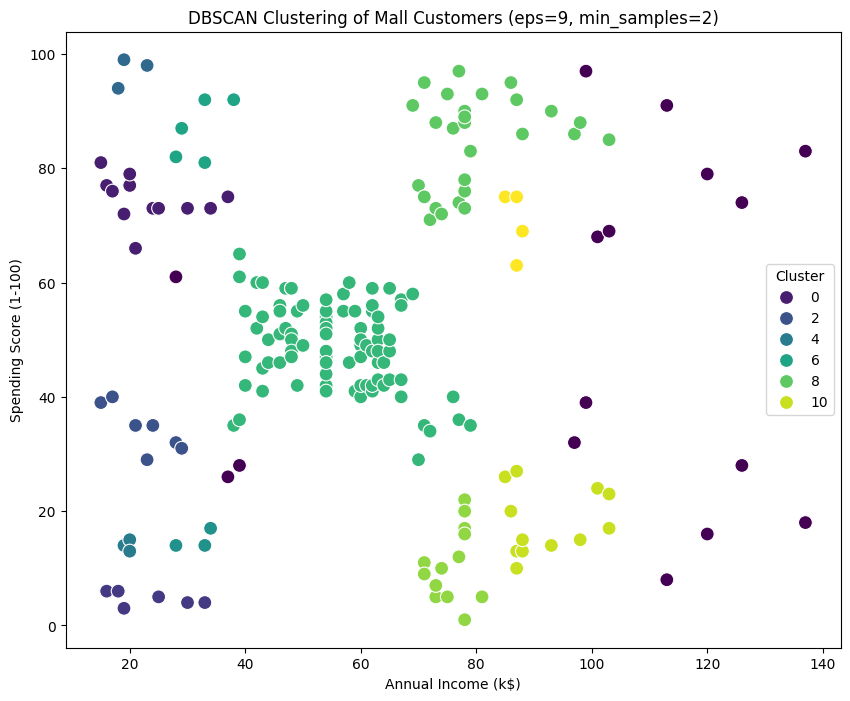

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Annual_Income_(k$)', y='Spending_Score', hue=dbscan.labels_, data=df, palette='viridis', s=100)
plt.title('DBSCAN Clustering of Mall Customers (eps=9, min_samples=2)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend(title='Cluster')
plt.show()